In [16]:
!pip install easyocr

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Saving gambar2.jfif to gambar2 (1).jfif
([[296, 163], [391, 163], [391, 213], [296, 213]], 'DRIVE', 0.9998668788526572)
([[278, 205], [413, 205], [413, 253], [278, 253]], 'ON LEFT', 0.9677663785543638)
([[280, 252], [408, 252], [408, 278], [280, 278]], 'IN AUSTRALIA', 0.657190052080806)


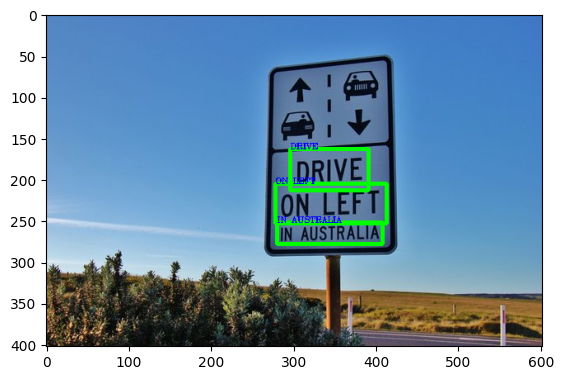

In [25]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import os

uploaded = files.upload()

# Save the uploaded image to a temporary file
image_filename = list(uploaded.keys())[0]
with open(image_filename, 'wb') as f:
    f.write(uploaded[image_filename])

# Read the image from the temporary file
img = cv2.imread(image_filename)

# Remove the temporary file
os.remove(image_filename)

# instance text detector
reader = easyocr.Reader(['id'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 3)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.35, (255, 0, 0), 1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()